In [440]:
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.integrate import quad

import math


In [441]:
def ShowArr(arr ,a,b,freq):
  plt.figure(figsize=(14,3))
  axis = np.arange(a,b,1/freq) 
  plt.plot( axis , arr,'*r-')
  plt.grid(True)
  plt.show()

def ShowFourier(arr,freq):
  plt.figure(figsize=(14,3))
  axis = [i*freq/len(arr) for i in range(len(arr))]
  plt.xlim (0, np.max(axis)/2)
  plt.plot( axis , np.abs(arr),'*r-')
  plt.grid(True)
  plt.show()

In [442]:
def fft(arr):
  return np.fft.fft(arr)
def ifft(arr):
  f = np.fft.ifft(arr)
  tmp = np.split( np.fft.ifft(arr) , 2)  
  return np.concatenate([tmp[1], tmp[0]])

In [443]:
class Array:
  def __init__(self, func , a,b,freq):
    self.func = func
    self.a = a
    self.b = b
    self.freq = freq
    self.arr_range = np.arange(a,b,1/freq)
    self.arr = np.array([func(x) for x in self.arr_range])  
  def show(self):
    plt.figure(figsize=(14,3))
    plt.plot(  self.arr_range , self.arr,'*r-')
    plt.grid(True)
    plt.show()
  def showFourier(self):
    plt.figure(figsize=(14,3))
    axis = [i*self.freq/len(self.arr_range) for i in range(len(self.arr_range))]
    plt.xlim (0, np.max(axis)/2)
    plt.plot( axis , np.abs(fft(self.arr)),'r-')
    plt.grid(True)
    plt.show()
  def setPrecision(self, freq , debug = False):
    fourier = fft(self.arr)
    tmp_freq = (freq * self.freq) / math.gcd(freq,self.freq)  
    if debug:
      print('Current frequency: ' , self.freq)
      print('Needed frequency: ' , freq)
      print('Temporary frequency: ' , tmp_freq)
    if (freq < self.freq):
      p = freq/2
      ar = []
      for i in range(len(self.arr_range)):  
        if i*self.freq/len(self.arr_range) > p and i*self.freq/len(self.arr_range) < self.freq - p :
          fourier[i] = 0
          ar.append(0)
        else:
          ar.append(1)

      if debug:
        print('Cutting: ','| p*tmp_freq = ',p*self.freq  , '| p = ' ,p ,'|  len(fourier) =' ,  len(fourier))
        #ShowArr(ar,self.a,self.b,self.freq )
        ShowFourier(np.abs(ar),self.freq )
        print('Сutted version:')
        #ShowArr(np.abs(fourier) ,self.a,self.b,self.freq)
        ShowFourier(np.abs(fourier) , self.freq )

    add = len(np.arange(self.a,self.b,1/tmp_freq)) - len(self.arr_range)     
    tmp_fourier = np.insert(fourier ,len(fourier)//2 , np.zeros(add))
    if debug:
      print('Temporary fourier:')
      ShowFourier(tmp_fourier , tmp_freq)
    tmp_arr = np.real(ifft(tmp_fourier))
    if debug:
      print('Temporary array:')
      ShowArr(tmp_arr,self.a,self.b,tmp_freq)
    arr = []
    for i in  range(0,len(tmp_arr) , int(tmp_freq / freq)):
      arr.append(tmp_arr[i])
    self.arr = arr
    self.freq = freq
    self.arr_range = np.arange(self.a,self.b,1/freq)

Function before


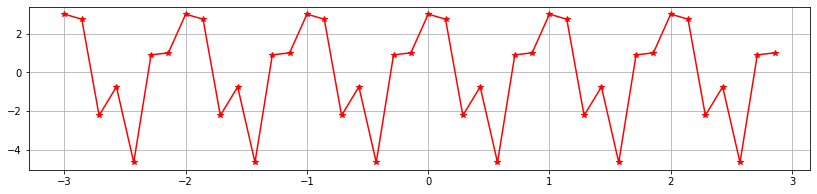

Fourier before


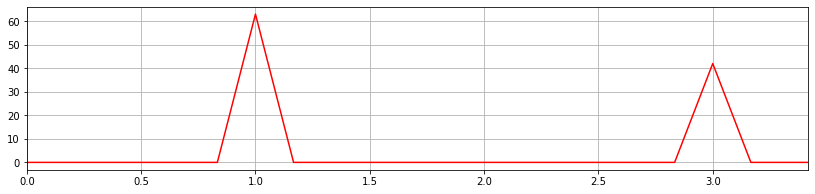

Current frequency:  7
Needed frequency:  20
Temporary frequency:  140.0
Temporary fourier:


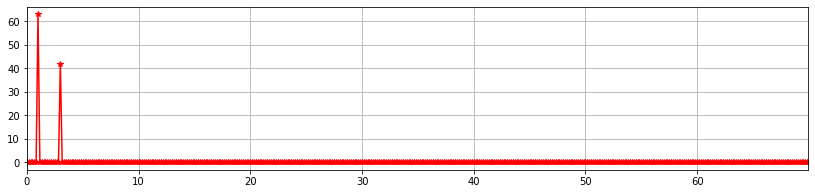

Temporary array:


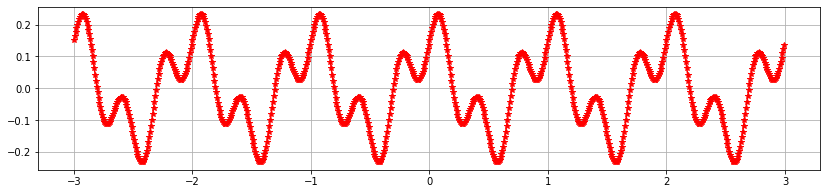

Function after


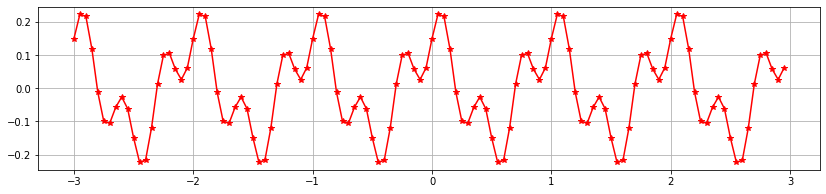

Fourier after


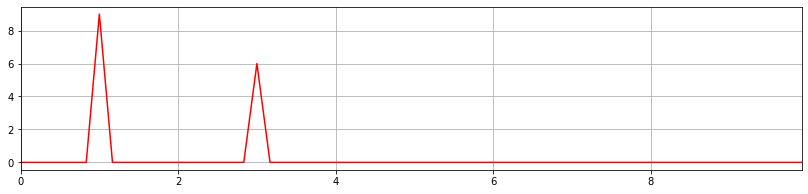

In [452]:
def cos_sin(a1,a2,w1,w2):
  return lambda x: a1*np.cos(w1*x*np.pi*2) + a2*np.sin(w2*x*np.pi*2)

arr = Array(cos_sin(3,2,1,3) , -3 , 3 ,7)
print('Function before')
arr.show()
print('Fourier before')
arr.showFourier()
arr.setPrecision(20,1)
print('Function after')
arr.show()
print('Fourier after')
arr.showFourier()